<a href="https://colab.research.google.com/github/RENISA-GRACELIN/Online_Internship_Projects/blob/main/A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
import os
import numpy as np
from keras.applications.densenet import DenseNet121, preprocess_input
from keras.preprocessing import image
import tensorflow as tf
from tensorflow.keras import layers
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix


In [2]:
from google.colab import drive
drive.mount('/content/drive')

# Data directories
train_dir = '/content/drive/MyDrive/DR_700/Train'
test_dir = '/content/drive/MyDrive/DR_700/Test'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Image dimensions
img_width, img_height = 300, 300  # Adjust according to your image dimensions
batch_size = 32
num_epochs = 20

In [4]:
# Load VGG16 model for feature extraction
model = DenseNet121(weights='imagenet', include_top=False)

29084464/29084464 [==============================] - 0s 0us/step


In [5]:
# Function to extract features from an image
def extract_features(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_data = image.img_to_array(img)
    img_data = np.expand_dims(img_data, axis=0)
    img_data = preprocess_input(img_data)
    features = model.predict(img_data)
    return features

In [6]:
# Load images and extract features
x_train, y_train = [], []
for i in range(5):
    class_dir = os.path.join(train_dir, str(i))
    for img_path in os.listdir(class_dir):
        features = extract_features(os.path.join(class_dir, img_path))
        x_train.append(features)
        y_train.append(i)


1/1 [==============================] - 0s 297ms/step


In [7]:
# Evaluate on test set
x_test, y_test = [], []
for i in range(5):
    class_dir = os.path.join(test_dir, str(i))
    for img_path in os.listdir(class_dir):
        features = extract_features(os.path.join(class_dir, img_path))
        x_test.append(features)
        y_test.append(i)



1/1 [==============================] - 0s 180ms/step


Training SVM with LINEAR kernel...
Performance metrics for linear kernel:
Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.47      0.46       105
           1       0.45      0.44      0.44       105
           2       0.38      0.40      0.39       105
           3       0.62      0.63      0.63       105
           4       0.64      0.58      0.61       105

    accuracy                           0.50       525
   macro avg       0.51      0.50      0.50       525
weighted avg       0.51      0.50      0.50       525

Confusion Matrix:
[[49 25 19  4  8]
 [31 46 20  6  2]
 [19 22 42 10 12]
 [ 4  4 18 66 13]
 [ 6  5 13 20 61]]
Accuracy: 0.5028571428571429
Sensitivity (Macro-average recall): 0.5028571428571429
Precision (Macro-average precision): 0.5067159705322323
F1 Score (Macro-average F1-score): 0.5044085470125205

Recall for class 0: 0.4666666666666667
Specificity for class 0: 0.8571428571428571

Recall for class 1: 0.4380

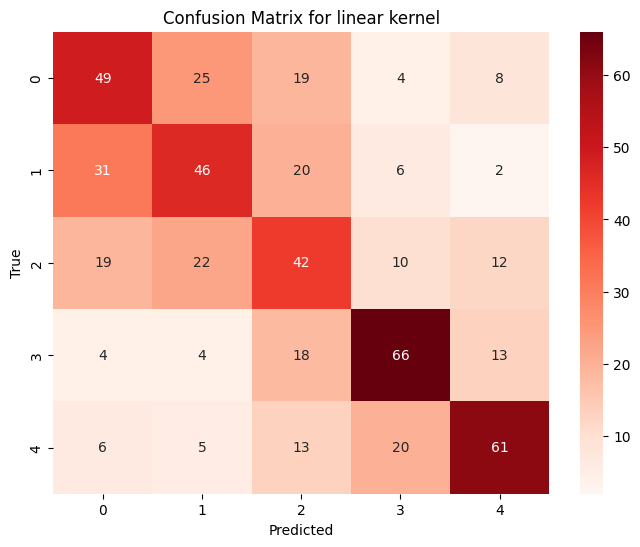

Training SVM with POLY kernel...
Performance metrics for poly kernel:
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.30      0.39       105
           1       0.50      0.67      0.57       105
           2       0.34      0.34      0.34       105
           3       0.58      0.57      0.58       105
           4       0.63      0.73      0.68       105

    accuracy                           0.52       525
   macro avg       0.53      0.52      0.51       525
weighted avg       0.53      0.52      0.51       525

Confusion Matrix:
[[31 31 23  5 15]
 [ 8 70 14 10  3]
 [ 9 30 36 15 15]
 [ 3  7 22 60 13]
 [ 1  3 11 13 77]]
Accuracy: 0.5219047619047619
Sensitivity (Macro-average recall): 0.5219047619047619
Precision (Macro-average precision): 0.5281541840759523
F1 Score (Macro-average F1-score): 0.5115208101116187

Recall for class 0: 0.29523809523809524
Specificity for class 0: 0.95

Recall for class 1: 0.6666666666666666
Spec

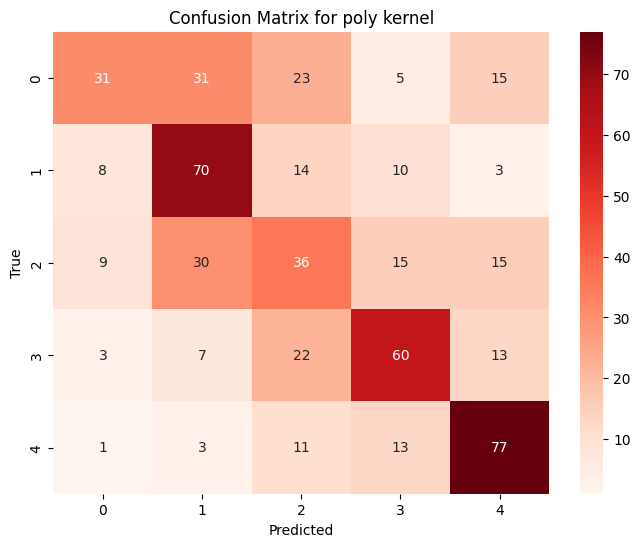

Training SVM with RBF kernel...
Performance metrics for rbf kernel:
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.23      0.34       105
           1       0.48      0.74      0.58       105
           2       0.33      0.35      0.34       105
           3       0.56      0.49      0.52       105
           4       0.59      0.68      0.63       105

    accuracy                           0.50       525
   macro avg       0.52      0.50      0.48       525
weighted avg       0.52      0.50      0.48       525

Confusion Matrix:
[[24 37 23  6 15]
 [ 2 78 13  8  4]
 [ 8 31 37 13 16]
 [ 3 10 27 51 14]
 [ 1  7 13 13 71]]
Accuracy: 0.49714285714285716
Sensitivity (Macro-average recall): 0.49714285714285716
Precision (Macro-average precision): 0.5179292820310392
F1 Score (Macro-average F1-score): 0.48174454071279255

Recall for class 0: 0.22857142857142856
Specificity for class 0: 0.9666666666666667

Recall for class 1: 0.742857

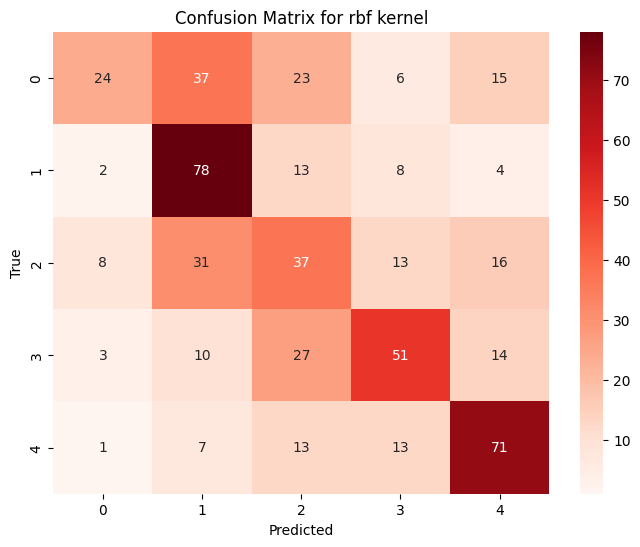

Training SVM with SIGMOID kernel...
Performance metrics for sigmoid kernel:
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.20      0.30       105
           1       0.40      0.75      0.52       105
           2       0.26      0.21      0.23       105
           3       0.51      0.41      0.45       105
           4       0.56      0.67      0.61       105

    accuracy                           0.45       525
   macro avg       0.47      0.45      0.42       525
weighted avg       0.47      0.45      0.42       525

Confusion Matrix:
[[21 41 23  5 15]
 [ 0 79 11 10  5]
 [ 9 43 22 14 17]
 [ 3 25 16 43 18]
 [ 2  8 12 13 70]]
Accuracy: 0.44761904761904764
Sensitivity (Macro-average recall): 0.4476190476190475
Precision (Macro-average precision): 0.46616966786714686
F1 Score (Macro-average F1-score): 0.4238096814894218

Recall for class 0: 0.2
Specificity for class 0: 0.9666666666666667

Recall for class 1: 0.752380952380952

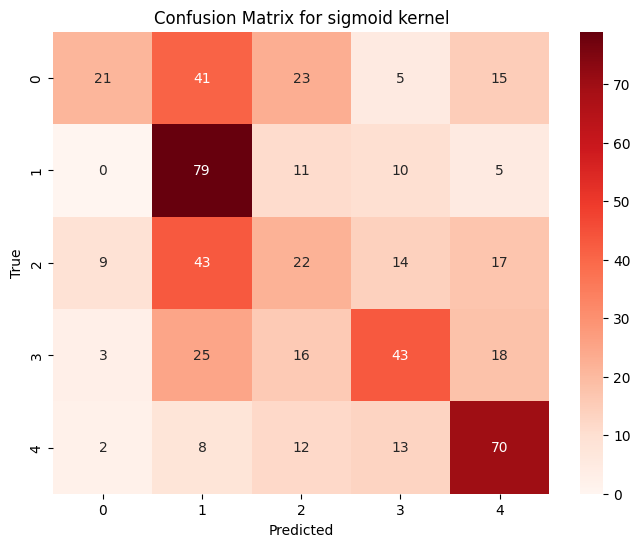

Training SVM with POLYNOMIAL_EXPONENTIAL kernel...
Performance metrics for polynomial_exponential kernel:
Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.47      0.46       105
           1       0.45      0.44      0.44       105
           2       0.38      0.40      0.39       105
           3       0.62      0.63      0.63       105
           4       0.64      0.58      0.61       105

    accuracy                           0.50       525
   macro avg       0.51      0.50      0.50       525
weighted avg       0.51      0.50      0.50       525

Confusion Matrix:
[[49 25 19  4  8]
 [31 46 20  6  2]
 [19 22 42 10 12]
 [ 4  4 18 66 13]
 [ 6  5 13 20 61]]
Accuracy: 0.5028571428571429
Sensitivity (Macro-average recall): 0.5028571428571429
Precision (Macro-average precision): 0.5067159705322323
F1 Score (Macro-average F1-score): 0.5044085470125205

Recall for class 0: 0.4666666666666667
Specificity for class 0: 0.857142857142

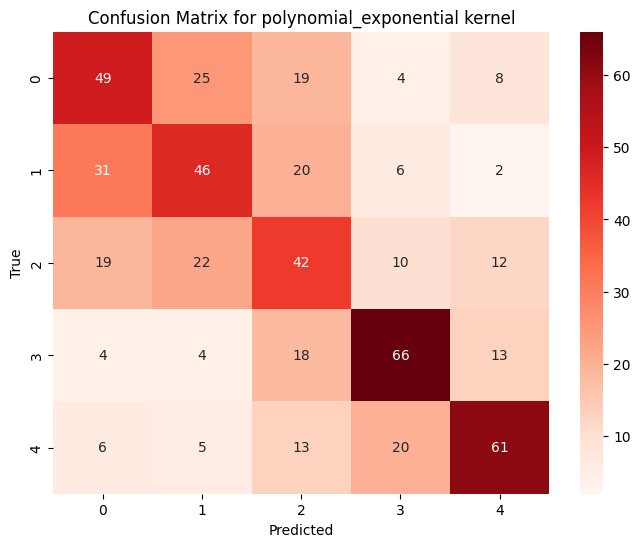

In [9]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, recall_score, precision_score
import seaborn as sns

# Flatten the features
x_train_flat = np.array([feature.flatten() for feature in x_train])
x_test_flat = np.array([feature.flatten() for feature in x_test])

# List of kernels to try
kernels = ['linear', 'poly', 'rbf', 'sigmoid', 'polynomial_exponential']

for kernel in kernels:
    print(f"\033[1mTraining SVM with {kernel.upper()} kernel...\033[0m")

    # Train SVM classifier
    if kernel == 'polynomial_exponential':
        clf = svm.SVC(kernel='precomputed')
        # Pre-compute the kernel matrix
        gram_train = np.dot(x_train_flat, x_train_flat.T)
        clf.fit(gram_train, y_train)
        gram_test = np.dot(x_test_flat, x_train_flat.T)
    else:
        clf = svm.SVC(kernel=kernel)
        clf.fit(x_train_flat, y_train)

    # Predict on test set
    if kernel == 'polynomial_exponential':
        y_pred = clf.predict(gram_test)
    else:
        y_pred = clf.predict(x_test_flat)

    # Print performance metrics
    print(f'Performance metrics for {kernel} kernel:')
    print('Classification Report:')
    print(classification_report(y_test, y_pred))  # Classification report with precision, recall, F1-score
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))  # Confusion matrix

    # Additional performance metrics
    accuracy = metrics.accuracy_score(y_test, y_pred)
    sensitivity = metrics.recall_score(y_test, y_pred, average='macro')
    precision = metrics.precision_score(y_test, y_pred, average='macro')
    f1 = metrics.f1_score(y_test, y_pred, average='macro')

    # Compute recall for each class
    recalls = recall_score(y_test, y_pred, average=None)

    # Compute specificity for each class
    # Specificity = TN / (TN + FP)
    cm = confusion_matrix(y_test, y_pred)
    specificity = []
    for i in range(cm.shape[0]):
        tn = np.sum(cm) - np.sum(cm[i, :]) - np.sum(cm[:, i]) + cm[i, i]
        fp = np.sum(cm[:, i]) - cm[i, i]
        specificity.append(tn / (tn + fp))

    print(f'Accuracy: {accuracy}')
    print(f'Sensitivity (Macro-average recall): {sensitivity}')
    print(f'Precision (Macro-average precision): {precision}')
    print(f'F1 Score (Macro-average F1-score): {f1}\n')

    for i, (recall, specific) in enumerate(zip(recalls, specificity)):
        print(f'Recall for class {i}: {recall}')
        print(f'Specificity for class {i}: {specific}\n')

    # Plot heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=range(5), yticklabels=range(5))
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix for {kernel} kernel')
    plt.show()


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, recall_score, precision_score
import seaborn as sns

# Flatten the features
x_train_flat = np.array([feature.flatten() for feature in x_train])
x_test_flat = np.array([feature.flatten() for feature in x_test])

# List of kernels to try
kernels = ['linear', 'poly', 'rbf', 'sigmoid', 'polynomial_exponential']

for kernel in kernels:
    print(f"\033[1mTraining SVM with {kernel} kernel...\033[0m")

    # Train SVM classifier
    if kernel == 'polynomial_exponential':
        clf = svm.SVC(kernel='precomputed')
        # Pre-compute the kernel matrix
        gram_train = np.dot(x_train_flat, x_train_flat.T)
        clf.fit(gram_train, y_train)
        gram_test = np.dot(x_test_flat, x_train_flat.T)
    else:
        clf = svm.SVC(kernel=kernel)
        clf.fit(x_train_flat, y_train)

    # Predict on test set
    if kernel == 'polynomial_exponential':
        y_pred = clf.predict(gram_test)
    else:
        y_pred = clf.predict(x_test_flat)

    # Print performance metrics
    print(f'Performance metrics for {kernel} kernel:')
    print('Classification Report:')
    print(classification_report(y_test, y_pred))  # Classification report with precision, recall, F1-score
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))  # Confusion matrix

    # Additional performance metrics
    accuracy = metrics.accuracy_score(y_test, y_pred)
    sensitivity = metrics.recall_score(y_test, y_pred, average='macro')
    precision = metrics.precision_score(y_test, y_pred, average='macro')
    f1 = metrics.f1_score(y_test, y_pred, average='macro')

    # Compute recall for each class
    recalls = recall_score(y_test, y_pred, average=None)

    # Compute specificity for each class
    # Specificity = TN / (TN + FP)
    cm = confusion_matrix(y_test, y_pred)
    specificity = []
    for i in range(cm.shape[0]):
        tn = np.sum(cm) - np.sum(cm[i, :]) - np.sum(cm[:, i]) + cm[i, i]
        fp = np.sum(cm[:, i]) - cm[i, i]
        specificity.append(tn / (tn + fp))

    print(f'Accuracy: {accuracy}')
    print(f'Sensitivity (Macro-average recall): {sensitivity}')
    print(f'Precision (Macro-average precision): {precision}')
    print(f'F1 Score (Macro-average F1-score): {f1}\n')

    for i, (recall, specific) in enumerate(zip(recalls, specificity)):
        print(f'Recall for class {i}: {recall}')
        print(f'Specificity for class {i}: {specific}\n')

    # Plot heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=range(5), yticklabels=range(5))
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix for {kernel} kernel')
    plt.show()
